In [8]:
import sys
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# The developed model by Jason Brownlee
# Link to article used to optimize accuracy: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

In [3]:
""" This model was defined by Jason Brownlee, a data scientist and AI afficionado.
The model is based off the VGG baseline model
The model uses many techniques to optimize accuracy:
1. Dropout Regularization - Nodes are randomly removed during training, to avoid nodes becoming reliant on their previous training
2. Batch Normalization - Standardizes inputs to a layer in a neural network to accelerate the training process
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [5]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=adam,
              loss=loss_object,
              metrics=['accuracy'])

# David: Running this data augmentation portion of the code gave me errors, so I omitted it even though it optimizes accuracy for the model              
# """Data augmentation is another method to optimize the accuracy of the model
# Data augmentation creates copies of the images used in training and makes minor random modifications to the image.
# This causes a regularizing effect to ward off the issues of random error
# """
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# it_train=datagen.flow(train_images,train_labels,batch_size=64)
# steps = int(train_images.shape[0]/64)

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100


c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 23s 11ms/step - loss: 1.6186 - accuracy: 0.4406 - val_loss: 1.2277 - val_accuracy: 0.5578
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1069 - accuracy: 0.6117 - val_loss: 0.8793 - val_accuracy: 0.6811
Epoch 3/100
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9178 - accuracy: 0.6794 - val_loss: 0.7836 - val_accuracy: 0.7266
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8204 - accuracy: 0.7164 - val_loss: 0.6470 - val_accuracy: 0.7716
Epoch 5/100
1563/1563 [==============================] - 16s 11ms/step - loss: 0.7328 - accuracy: 0.7481 - val_loss: 0.6139 - val_accuracy: 0.7833
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6658 - accuracy: 0.7712 - val_loss: 0.5971 - val_accuracy: 0.7965
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6266 - accuracy: 0.7869 - val_loss: 0.5756 - val_

313/313 - 1s - loss: 0.4777 - accuracy: 0.8756 - 1s/epoch - 5ms/step


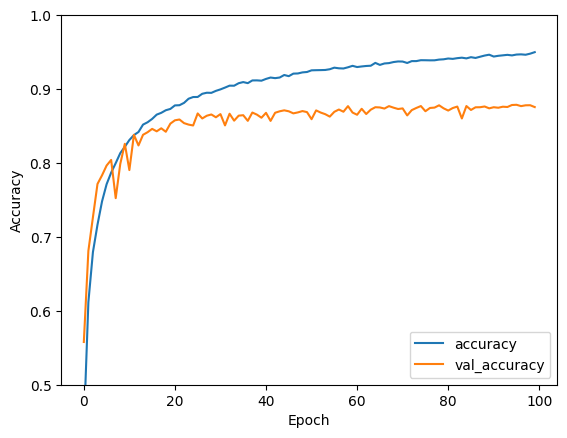

In [6]:
#Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [7]:
print(test_acc)

0.8755999803543091
